# M.Tech.in Data Science and Engineering from BITS, Pilani
### Dissertation : Customer Sentiment Analysis Leading to Early Warning System
### Name: Lingaraj Prachande
### Roll No: 2019HC04663

#### Customer sentiment analysis is the process of automatically detecting emotions of customer when they interact with our products, services, people & brand. Here, I am getting data from varioussources like Survey outputs, customer feeback & eviews from social media like Twitter. Built the model using Naive Bayes and executing the predition in '.csv' file! 

### Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False )

# Loading Dataset

In [67]:
tweets_df = pd.read_csv('FCA_DataNo.csv')
tweets_df

,id,area,review,label
0,1,Fujitsu as an ICT partner,Very supportive and can provide IT related sol...,0
1,2,Fujitsu as an ICT partner,"Flexibility, cooperation and partnership spirit",0
2,3,Fujitsu as an ICT partner,Responsible and always i can see an effort to ...,0
3,4,Fujitsu as an ICT partner,"Strong technical expertise, good customer serv...",0
4,5,Fujitsu as an ICT partner,Trusted partner.,0
...,...,...,...,...
1340,1366,Fujitsu Brand,not exposed to Fuijtsu as a DX partner,1
1341,1367,Fujitsu Brand,Fujitsu works as a partner to understand my us...,1
1342,1368,Fujitsu Brand,Not sure if Fujitsu has demonstrated capabilit...,1
1343,1369,Fujitsu Brand,"Maybe, not sure",1


### Describing the data 

In [68]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1345 non-null   int64 
 1   area    1345 non-null   object
 2   review  1345 non-null   object
 3   label   1345 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 42.2+ KB


In [69]:
tweets_df.describe()

,id,label
count,1345.000000,1345.000000
mean,684.724164,0.200743
std,396.053533,0.400706
min,1.000000,0.000000
25%,341.000000,0.000000
50%,686.000000,0.000000
75%,1027.000000,0.000000
max,1370.000000,1.000000


In [70]:
tweets_df['review']

0       Very supportive and can provide IT related sol...
1         Flexibility, cooperation and partnership spirit
2       Responsible and always i can see an effort to ...
3       Strong technical expertise, good customer serv...
4                                        Trusted partner.
                              ...                        
1340               not exposed to Fuijtsu as a DX partner
1341    Fujitsu works as a partner to understand my us...
1342    Not sure if Fujitsu has demonstrated capabilit...
1343                                      Maybe, not sure
1344    It would be inappropriate for me to make such ...
Name: review, Length: 1345, dtype: object

In [71]:
### Dropping the 'id' & 'area' column

tweets_df = tweets_df.drop(['id'], axis=1)
tweets_df = tweets_df.drop(['area'], axis=1)
#tweets_df = tweets_df.drop(['Oldlabel'], axis=1)

tweets_df

,review,label
0,Very supportive and can provide IT related sol...,0
1,"Flexibility, cooperation and partnership spirit",0
2,Responsible and always i can see an effort to ...,0
3,"Strong technical expertise, good customer serv...",0
4,Trusted partner.,0
...,...,...
1340,not exposed to Fuijtsu as a DX partner,1
1341,Fujitsu works as a partner to understand my us...,1
1342,Not sure if Fujitsu has demonstrated capabilit...,1
1343,"Maybe, not sure",1


### Exploring the Dataset

In [72]:
#We will get the length of the messages
tweets_df['lenght'] = tweets_df['review'].str.len()

In [73]:
tweets_df

,review,label,lenght
0,Very supportive and can provide IT related sol...,0,51
1,"Flexibility, cooperation and partnership spirit",0,47
2,Responsible and always i can see an effort to ...,0,62
3,"Strong technical expertise, good customer serv...",0,79
4,Trusted partner.,0,16
...,...,...,...
1340,not exposed to Fuijtsu as a DX partner,1,38
1341,Fujitsu works as a partner to understand my us...,1,192
1342,Not sure if Fujitsu has demonstrated capabilit...,1,195
1343,"Maybe, not sure",1,15


,label,lenght
count,1345.000000,1345.000000
mean,0.200743,87.845353
std,0.400706,86.499827
min,0.000000,2.000000
25%,0.000000,35.000000
50%,0.000000,65.000000
75%,0.000000,109.000000
max,1.000000,1104.000000


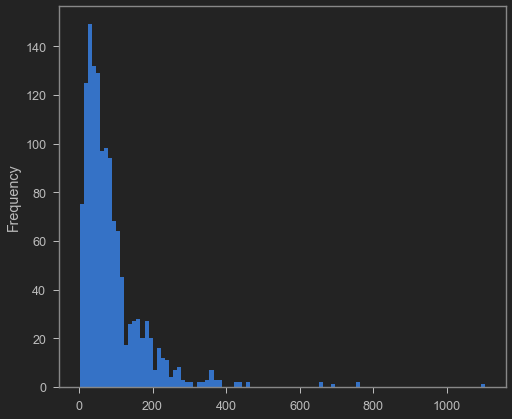

In [74]:
tweets_df['lenght'].plot(bins=100, kind = 'hist')
tweets_df.describe()

In [75]:
# check the minimum length tweet
tweets_df[tweets_df['lenght'] == 6]['review'].iloc[0]

'Agree.'

In [76]:
# Let us divide the tweets in to positive and negative
positive = tweets_df[tweets_df['label']==0]
positive

,review,label,lenght
0,Very supportive and can provide IT related sol...,0,51
1,"Flexibility, cooperation and partnership spirit",0,47
2,Responsible and always i can see an effort to ...,0,62
3,"Strong technical expertise, good customer serv...",0,79
4,Trusted partner.,0,16
...,...,...,...
1287,Quality of Services & Quality Products,0,38
1288,"As previously answered, solid product, well te...",0,143
1289,The project teams I have had have worked with ...,0,117
1290,very professional and always available.,0,39


In [77]:
negative = tweets_df[tweets_df['label']==1]
negative

,review,label,lenght
1004,Not sure we know what we want...............,1,44
1005,Need improvement in quality of SME,1,34
1006,While Fujitsu has certainly improved the quali...,1,111
1007,Consistent quality has been delivered,1,37
1008,"not yet at least, seems that most of the thing...",1,70
...,...,...,...
1340,not exposed to Fuijtsu as a DX partner,1,38
1341,Fujitsu works as a partner to understand my us...,1,192
1342,Not sure if Fujitsu has demonstrated capabilit...,1,195
1343,"Maybe, not sure",1,15


In [78]:
# Detail level accessment can be done fr 'Neutral' feedback also
#neutral = tweets_df[tweets_df['label']=='neutral']
#neutral

In [79]:
sentences = tweets_df['review'].tolist()
sentences

['Very supportive and can provide IT related solution',
 'Flexibility, cooperation and partnership spirit',
 'Responsible and always i can see an effort to find a solution ',
 'Strong technical expertise, good customer service, attend to inquiries promptly',
 'Trusted partner.',
 'Great partner to work with ',
 'Good company who listens to the customer',
 'Responsive and focused on our needs with top technology.',
 'Fujitsu is a phenomenal partner that brings highly skilled team members to projects and they deliver at a high volume.',
 'reliable and seems to perform well',
 'They have some very knowledgeable SME and can work with you to achieve required outcomes ',
 'The Fujitsu staff I have worked with are always professional and have made it a priority to learn enough about the business and its requirements to add extra value to service operations and continual service improvement.',
 "over time Fujitsu have grown to develop a good understanding LInk's business and have worked as a p

In [80]:
len(sentences)

1345

In [81]:
sentences_as_one_string = "".join(sentences)

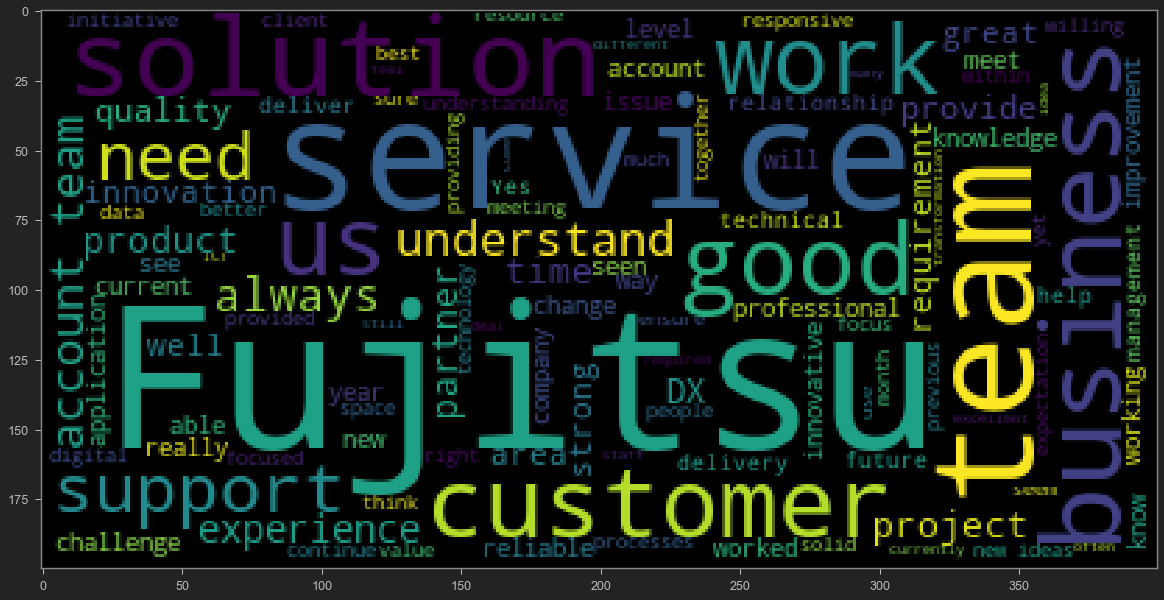

In [82]:
from wordcloud import WordCloud 
plt.figure(figsize =(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

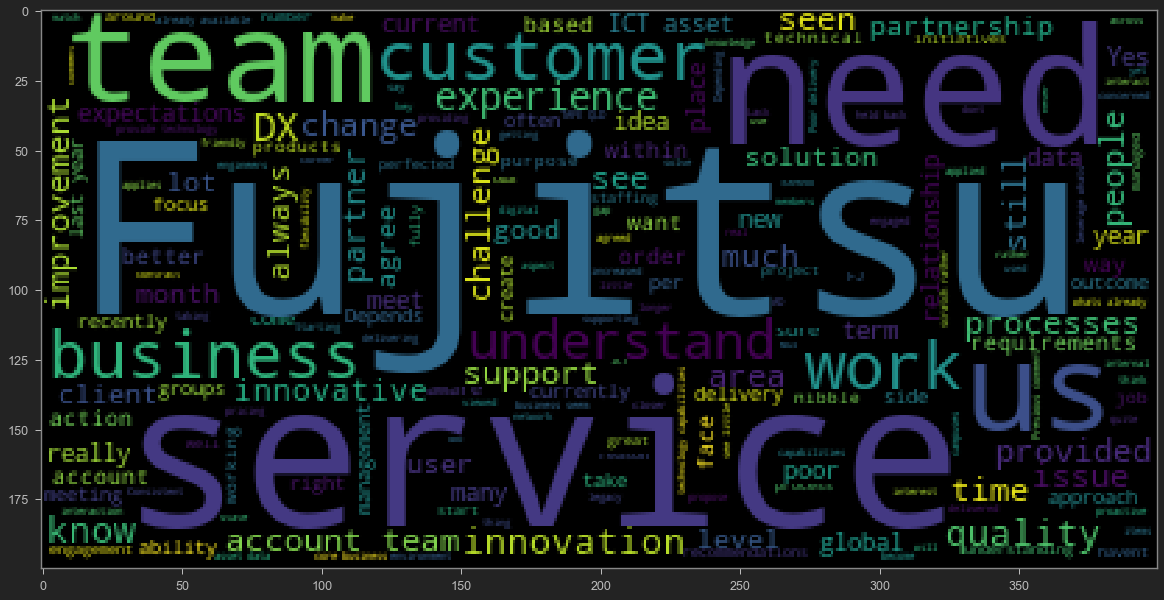

In [83]:
negative_list = negative ['review'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize =(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string) )

### Data Cleaning

In [84]:
# Remove functuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [85]:
#Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prachali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [86]:
def message_cleaning (message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = "" .join(test_punc_removed)
    test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_clean

In [87]:
tweets_df_clean = tweets_df['review'].apply(message_cleaning)
print(tweets_df_clean[5])

['Great', 'partner', 'work']


### Building the Model 

In [88]:
### Apply the Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
tweet_vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['review'])
tweet_vectorizer.shape

(1345, 2009)

In [89]:
### Build the model
X =tweet_vectorizer
y = tweets_df['label']
from sklearn.model_selection import train_test_split

In [91]:
tweets_df.label.value_counts()

0    1075
1     270
Name: label, dtype: int64

In [92]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
#print(X_train.shape, X_test.shape)

In [93]:
xtrain, xtest, ytrain, ytest = train_test_split(tweets_df['review'].values, tweets_df['label'].values, 
                                                test_size =.20, random_state=10)

In [94]:
xtrain

array(['most of our applications do not cover the environment side of things however they are certainly used in Social  and Governance, covering off housing, project development  and  assett management and the numerous processes involved within these areas.',
       'Well referenced and proven. ', 'agree', ...,
       'So far good experience working with FSIPL',
       'Not acting as a supporting partner',
       'The project teams I have had have worked with me on the way I needed projects to be run and with the right resources.'],
      dtype=object)

In [95]:
print(xtrain.shape, xtest.shape)

(1076,) (269,)


In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
cv = CountVectorizer()

In [98]:
cv.fit(xtrain)

CountVectorizer()

In [99]:
cv.get_feature_names()

D:\BITs\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '100',
 '12',
 '15',
 '18',
 '19',
 '1finity',
 '1st',
 '2017',
 '2020',
 '2021',
 '3rd',
 '70k',
 '75',
 '85',
 '94',
 'ability',
 'able',
 'about',
 'above',
 'abreast',
 'absolutely',
 'accepted',
 'account',
 'accountable',
 'acct',
 'accumulated',
 'accurate',
 'accurately',
 'accuratly',
 'achieve',
 'achieved',
 'acknowledging',
 'acknowleding',
 'acquainted',
 'across',
 'acting',
 'action',
 'actionable',
 'actions',
 'activatenow',
 'active',
 'actively',
 'activity',
 'actual',
 'actually',
 'ad',
 'adapt',
 'adaptability',
 'adaptive',
 'add',
 'additional',
 'address',
 'addressed',
 'adds',
 'adept',
 'adherence',
 'admirable',
 'adopted',
 'advance',
 'advanced',
 'advancing',
 'advice',
 'advices',
 'advnace',
 'advocate',
 'advocator',
 'after',
 'again',
 'against',
 'agency',
 'agenda',
 'aggregated',
 'agile',
 'ago',
 'agree',
 'agreed',
 'agreemebt',
 'agreement',
 'ai',
 'aimed',
 'air',
 'airport',
 'alan',
 'align',
 'aligned',
 'alignment',
 'aligns',


In [101]:
print (len(cv.get_feature_names()))

1811


In [102]:
cv_train = cv.transform(xtrain).toarray()
cv_test = cv.transform(xtest)

In [103]:
print(cv_train.shape)
print(cv_test.shape)

(1076, 1811)
(269, 1811)


In [104]:
cv_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [107]:
NB_classifier = MultinomialNB() #(alpha=1)
LG_classifier = LogisticRegression()

In [108]:
NB_classifier.fit(cv_train, ytrain)

MultinomialNB()

In [109]:
LG_classifier.fit(cv_train, ytrain)

LogisticRegression()

In [110]:
LG_pred = LG_classifier.predict(cv_test)
NB_pred = NB_classifier.predict(cv_test)

### Assess the model performance

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       218
           1       0.74      0.39      0.51        51

    accuracy                           0.86       269
   macro avg       0.81      0.68      0.72       269
weighted avg       0.85      0.86      0.84       269



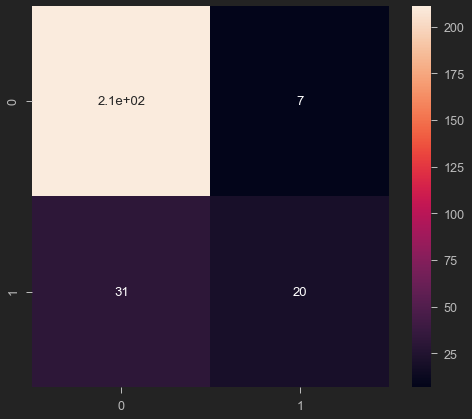

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
NB_predict_test = NB_classifier.predict(cv_test)
cm = confusion_matrix(ytest, NB_predict_test)
sns.heatmap (cm, annot=True)
print(classification_report(ytest, NB_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       218
           1       0.84      0.41      0.55        51

    accuracy                           0.87       269
   macro avg       0.86      0.70      0.74       269
weighted avg       0.87      0.87      0.86       269



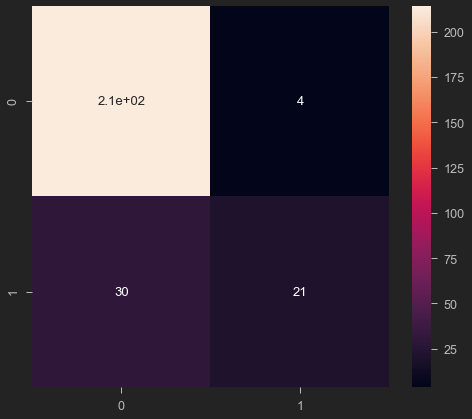

In [114]:
LG_predict_test = LG_classifier.predict(cv_test)
cm = confusion_matrix(ytest, LG_predict_test)
sns.heatmap (cm, annot=True)
print(classification_report(ytest, LG_predict_test))

### Evaluation

In [115]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix

In [117]:
print("Logistic Regression")
print("Training Score: ", LG_classifier.score(cv_train, ytrain))
print("Testing Score: ", LG_classifier.score(cv_test, ytest))
print()
print("Confusion Matrix")
print(confusion_matrix(ytest, LG_pred))
print(precision_score(ytest, LG_pred))
print(recall_score(ytest, LG_pred))
print(accuracy_score(ytest, LG_pred))

Logistic Regression
Training Score:  0.9758364312267658
Testing Score:  0.8736059479553904

Confusion Matrix
[[214   4]
 [ 30  21]]
0.84
0.4117647058823529
0.8736059479553904


In [119]:
print("Naive Bayes")
print("Training Score: ", NB_classifier.score(cv_train, ytrain))
print("Testing Score: ", NB_classifier.score(cv_test, ytest))
print()
print("Confusion Matrix")
print(confusion_matrix(ytest, NB_pred))
print(precision_score(ytest, NB_pred))
print(recall_score(ytest, NB_pred))
print(accuracy_score(ytest, NB_pred))

Naive Bayes
Training Score:  0.9451672862453532
Testing Score:  0.8587360594795539

Confusion Matrix
[[211   7]
 [ 31  20]]
0.7407407407407407
0.39215686274509803
0.8587360594795539


In [120]:
r = np.array(["I had a good Experience", "Please will go here", "I don't love this", "Not exposed for this", 
              "Very bad experience"])

In [121]:
cvr = cv.transform(r)

In [122]:
print(cvr.shape)

(5, 1811)


In [123]:
NB_classifier.predict(cvr)

array([0, 0, 0, 0, 0], dtype=int64)

In [124]:
naive= NB_classifier.predict(cvr)

In [125]:
logistic= LG_classifier.predict(cvr)

In [126]:
mydf= pd.DataFrame({"Comment": r, "Naive Prediction": naive, "Logistic Prediction": logistic })
mydf

,Comment,Naive Prediction,Logistic Prediction
0,I had a good Experience,0,0
1,Please will go here,0,0
2,I don't love this,0,0
3,Not exposed for this,0,0
4,Very bad experience,0,0


# Export file to pkl

In [127]:
import pickle

In [128]:
filename = "review_model_log.pkl"
file = open(filename, "wb")
pickle.dump(LG_classifier, file)
file.close()

In [129]:
f1 = open("review_model_log.pkl", "rb")
c=pickle.load (f1)
c

LogisticRegression()

In [130]:
countvector = "review_cv.pkl"
cfile = open(countvector, "wb")
pickle.dump(cv, cfile)
file.close()

In [131]:
cf1 = open("review_cv.pkl", "rb")
cv = pickle.load(cf1)
cv

CountVectorizer()

### GUI based interaction to validate the correctness of the Model

In [132]:
from tkinter import * 
from tkinter import messagebox
from sklearn import *

In [133]:
def get_prediction():
    rv = lb.get("1.0", END)
    tst = cv.transform([rv])
    rs = c.predict(tst)
    label = {0: "Customer is Satisfied 😀", 1: "Customer is not Satisfied ☹️"}
    dd = label[rs[0]]
    lbl1.config(text = dd, fg="green")
    messagebox.showinfo("Result", dd)
    
main = Tk()
main.title("Sentiment Analysis of Fujitsu Customers")
lbl= Label(text = "SENTIMENT ANALYSIS", fg ="red", bg ="white", font=("georgia", 20))
lbl1= Label(text = "Model Validator", fg ="red", bg ="white", font=("georgia", 16))
lbl.pack()
lbl1.pack()

lbl1 = Label(bg = "white", font=("georgia", 20))
lbl1.pack()

lb = Text(main,)
lb.pack(pady=3)

btn = Button(main, bg ="green", fg ="white", text ="Check", height=5, command=get_prediction)
btn.pack(fill = "x", pady=3)

main.mainloop()
    

#### Big thanks to my mentor & Supervisor - Mr. Meghan Nandgaonkar and examiner - Mrs. Shweta Dharmadhikari for all the guidance and support! 
#### I would like to thank Fujitsu Consulting India Pvt. Ltd., Pune for providing all the necessary infrastructure, software & support while working on this dissertation. Special thanks to Birla Institute of Technology for helping me to achieve my dream to complete my masters in ‘Data Science’. 